In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a) Sketching the concentration distribution

In [5]:
# Define diffusion function
def thermalDiffusion(x, t, D, x_0):
    return 1/np.sqrt(4*np.pi*D*t) * np.exp(-(x-x_0)**2/(4*D*t))
def thermalDiffusivity(lmbda, rho, c_p):
    return lmbda/(rho*c_p)

In [19]:
# Plot for example values
t1 = 100 #s
t2 = 400 #s
x_0 = 10 #m

kappa = thermalDiffusivity(2.6E-4, 1.169E-3, 1.007)

x = np.linspace(-40,60,1000)

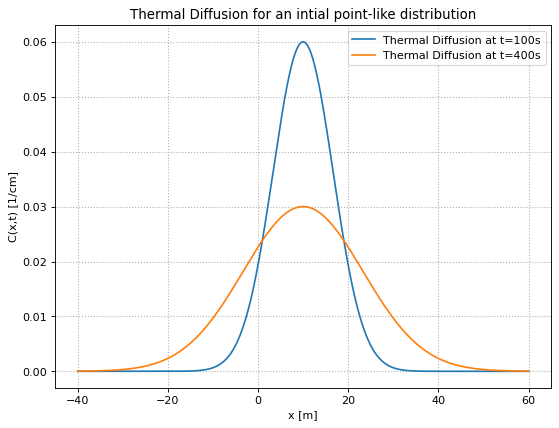

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x,thermalDiffusion(x,t1,kappa,x_0), label="Thermal Diffusion at t=100s")
plt.plot(x,thermalDiffusion(x,t2,kappa,x_0), label="Thermal Diffusion at t=400s")
plt.xlabel('x [m]')
plt.ylabel('C(x,t) [1/cm]')
plt.title('Thermal Diffusion for an intial point-like distribution')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

### b) Determining how far heat and CO2 are distributed in the ocean and the atmosphere after a minute / a day

In [23]:
kappa_air = kappa
kappa_water = thermalDiffusivity(6.07E-3, 0.997, 4.217)

D_air = 0.16
D_water = 1.9E-5

diffusionConstantArray = np.array([kappa_air, kappa_water, D_air, D_water])

In [24]:
def sigmaGauß(diffusionConstant, t):
    return 2*diffusionConstant*t
sigma_array_1m = sigmaGauß(diffusionConstantArray, 60)
sigma_array_1d = sigmaGauß(diffusionConstantArray, 86400)

In [30]:
print("Standard Deviation for heat in the atmosphere after 1 Minute:", sigma_array_1m[0], "[cm]")
print("Standard Deviation for heat in the atmosphere after 1 Day:", sigma_array_1d[0], "[cm]")

print("Standard Deviation for heat in the ocean after 1 Minute:", sigma_array_1m[1], "[cm]")
print("Standard Deviation for heat in the ocean after 1 Day:", sigma_array_1d[1], "[cm]")

print("Standard Deviation for CO2 in the atmosphere after 1 Minute:", sigma_array_1m[2], "[cm]")
print("Standard Deviation for CO2 in the atmosphere after 1 Day:", sigma_array_1d[2], "[cm]")

print("Standard Deviation for CO2 in the ocean after 1 Minute:", sigma_array_1m[3], "[cm]")
print("Standard Deviation for CO2 in the ocean after 1 Day:", sigma_array_1d[3], "[cm]")

Standard Deviation for heat in the atmosphere after 1 Minute: 26.503950532754892 [cm]
Standard Deviation for heat in the atmosphere after 1 Day: 38165.68876716704 [cm]
Standard Deviation for heat in the ocean after 1 Minute: 0.17324917603177092 [cm]
Standard Deviation for heat in the ocean after 1 Day: 249.47881348575015 [cm]
Standard Deviation for CO2 in the atmosphere after 1 Minute: 19.2 [cm]
Standard Deviation for CO2 in the atmosphere after 1 Day: 27648.0 [cm]
Standard Deviation for CO2 in the ocean after 1 Minute: 0.00228 [cm]
Standard Deviation for CO2 in the ocean after 1 Day: 3.2832000000000003 [cm]


### c) Effects of turbulence on the diffusion process
The eddies in a turbulent fluid causes fluid parcels of a certain concentration C to be moved into an area of the fluid with a higher of lower concentration C', which causes the concentrations to mix up and the diffusion to occur faster.